In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

Introduction:

This data is about baseball game which being played in 2014 and need to predict next year i.e., for 2015 who will be the winning team
on the basis of 2014 data with the help of algorithm using machine learning.

## Hypothesis

There are total 16 features present in data on the basis of which we will be going to predict. Details are given below:

1. R = Total Runs in 2014
2. AB = At Bats(taking your turn to try to hit the ball in a baseball game)
3. H = Hits(Striking for the target aimed at)
4. 2B = Doubles(A batter is credited with a double when he hits the ball into play and reaches second 
        base without the help of an intervening error or attempt to put out another baserunner. Doubles 
        are typically hit either into a gap, down the lines or off the outfield wall.)
5. 3B = Triples(a triple occurs when a batter hits the ball into play and reaches third base without the
        help of an intervening error or attempt to put out another baserunner.)
6. HR = Homeruns(A home run occurs when a batter hits a fair ball and scores on the play without being 
        put out or without the benefit of an error)
7. BB = Walks(A walk (or base on balls) occurs when a pitcher throws four pitches out of the strike zone,
        none of which are swung at by the hitter. After refraining from swinging at four pitches out of the zone, 
        the batter is awarded first base. In the scorebook, a walk is denoted by the letters BB.)
8. SO = Strikeouts( strikeout occurs when a pitcher throws any combination of three swinging or looking strikes to
        a hitter. ... However, even if the batter reaches first base safely, the pitcher and the batter are still 
        credited with a strikeout in the scorebook)
9. SB = Stolen Bases(n baseball, a stolen base occurs when a runner advances to a base to which he is not entitled and
        the official scorer rules that the advance should be credited to the action of the runner.)
10. RA = Runs Allowed(Runs Allowed is the amount of runs that score against a pitcher. This includes earned runs and unearned runs)
11. ER = Earned Runs
          (An earned run is any run that scores against a pitcher without the benefit of an error or a passed ball)
12. ERA = earned Run Average (Earned run average represents the number of earned runs a pitcher allows per nine 
          innings -- with earned runs being any runs that scored without the aid of an error or a passed ball. 
          ERA is the most commonly accepted statistical tool for evaluating pitchers.)
13. CG = Shtout (a shutout refers to the act by which a single pitcher pitches a complete game and does not allow 
         the opposing team to score a run.)
14. SHO = Saves (A save is awarded to the relief pitcher who finishes a game for the winning team, under certain 
          circumstances. A pitcher cannot receive a save and a win in the same game)
15. SV = Complete Games(A pitcher earns a complete game if he pitches the entire game for his team regardless of how 
         long it lasts. ... It takes a major effort for a pitcher to toss a complete game, as fatigue generally sets 
         in during the later innings)
16. E = Errors(In baseball statistics, an error is an act, in the judgment of the official scorer, of a fielder 
        misplaying a ball in a manner that allows a batter or baserunner to advance one or more bases or allows 
        a plate appearance to continue after the batter should have been put out.)




Here target is W (No of predicted Wins) on the basis of which we will be going to predict the winning chances for team in 2015

In [2]:
df = pd.read_csv('/Users/juhimishra/Downloads/Data-Science-ML-Capstone-Projects-master/baseball.csv')
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [3]:
# Checking the shape of data
print("No of rows - ",df.shape[0])
print("No of columns -",df.shape[1])

No of rows -  30
No of columns - 17


In [4]:
df.W.unique()

array([ 95,  83,  81,  76,  74,  93,  87,  80,  78,  88,  86,  85,  68,
       100,  98,  97,  64,  90,  71,  67,  63,  92,  84,  79])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


with the help of info method analysed that there are no object so no need to use any encoding method

In [6]:
df['W'].value_counts()

68     3
81     2
74     2
76     2
83     2
80     1
97     1
98     1
67     1
71     1
78     1
79     1
95     1
100    1
92     1
84     1
85     1
86     1
87     1
88     1
90     1
63     1
93     1
64     1
Name: W, dtype: int64

In [7]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


Analysis mentioned below on the basis of above static data:
1. No missing values
2. above data looks pretty good as skewness and outliers chances are less.
3. Min win i 2014 was 63 and max was 100.
4. Similarly for runs also we can see that min was 573 and max was 891.

In [8]:
# Let's check missing value 
df.isna().sum().to_frame('Any Missing value')

,Any Missing value
W,0
R,0
AB,0
H,0
2B,0
3B,0
HR,0
BB,0
SO,0
SB,0


There are no missing values in baseball data

## Univariate analysis

In [9]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [10]:
df.rename(columns ={'2B':'Doubles','3B':'Triples'},inplace = True)

In [11]:
df.columns

Index(['W', 'R', 'AB', 'H', 'Doubles', 'Triples', 'HR', 'BB', 'SO', 'SB', 'RA',
       'ER', 'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [12]:
df['R'].value_counts()

696    2
689    2
703    1
669    1
644    1
720    1
647    1
713    1
650    1
655    1
656    1
724    1
661    1
729    1
667    1
737    1
573    1
613    1
683    1
748    1
622    1
751    1
626    1
694    1
697    1
891    1
764    1
640    1
Name: R, dtype: int64

<AxesSubplot:xlabel='R', ylabel='W'>

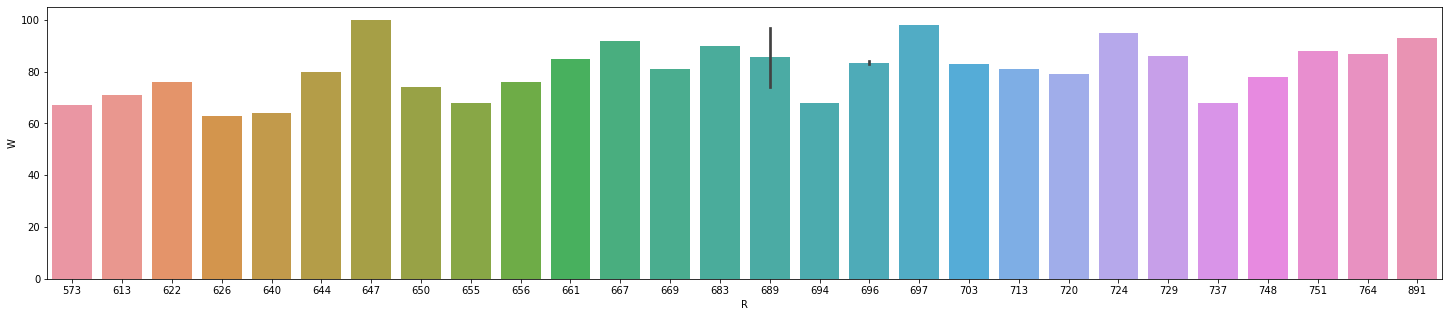

In [13]:
plt.figure(figsize=(25,5))
sns.barplot(x = 'R',y ='W',data=df)

In [14]:
df['AB'].value_counts()

5485    2
5631    1
5467    1
5572    1
5509    1
5575    1
5640    1
5385    1
5567    1
5511    1
5649    1
5459    1
5480    1
5463    1
5529    1
5533    1
5565    1
5439    1
5600    1
5527    1
5605    1
5544    1
5417    1
5484    1
5420    1
5491    1
5428    1
5457    1
5571    1
Name: AB, dtype: int64

<AxesSubplot:xlabel='AB', ylabel='W'>

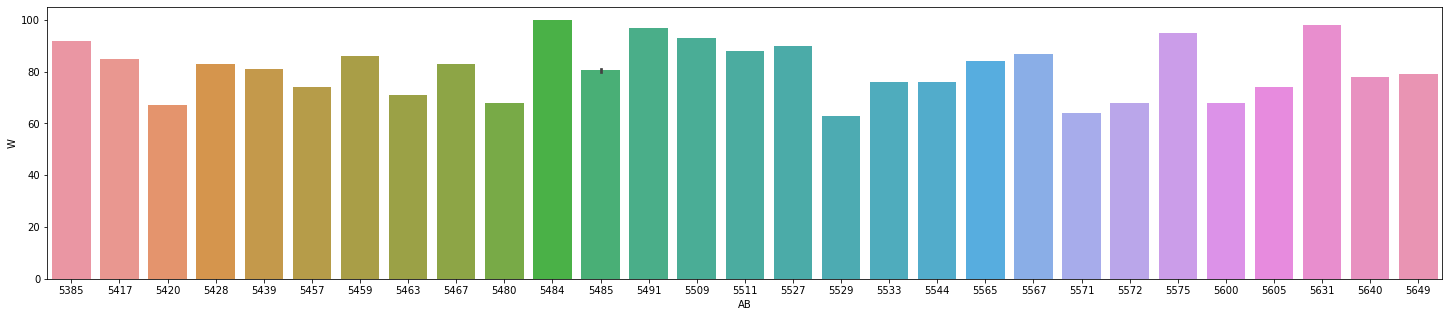

In [15]:
plt.figure(figsize=(25,5))
sns.barplot(x = 'AB',y ='W',data=df)

In [16]:
df['H'].value_counts()

1363    2
1341    1
1497    1
1405    1
1349    1
1351    1
1480    1
1479    1
1419    1
1420    1
1486    1
1361    1
1494    1
1495    1
1370    1
1462    1
1374    1
1378    1
1379    1
1381    1
1382    1
1383    1
1386    1
1515    1
1324    1
1331    1
1395    1
1397    1
1346    1
Name: H, dtype: int64

<AxesSubplot:xlabel='H', ylabel='W'>

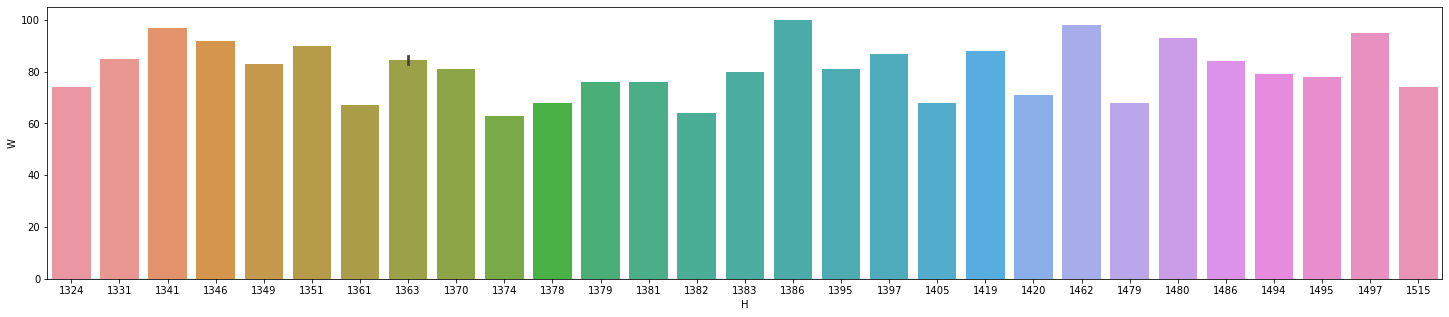

In [17]:
plt.figure(figsize=(25,5))
sns.barplot(x ='H',y ='W',data=df)

In [18]:
df['Doubles'].value_counts()

272    3
288    2
278    2
289    2
277    2
260    2
274    2
251    1
236    1
294    1
295    1
262    1
265    1
257    1
263    1
292    1
303    1
243    1
308    1
246    1
279    1
300    1
Name: Doubles, dtype: int64

<AxesSubplot:xlabel='Doubles', ylabel='W'>

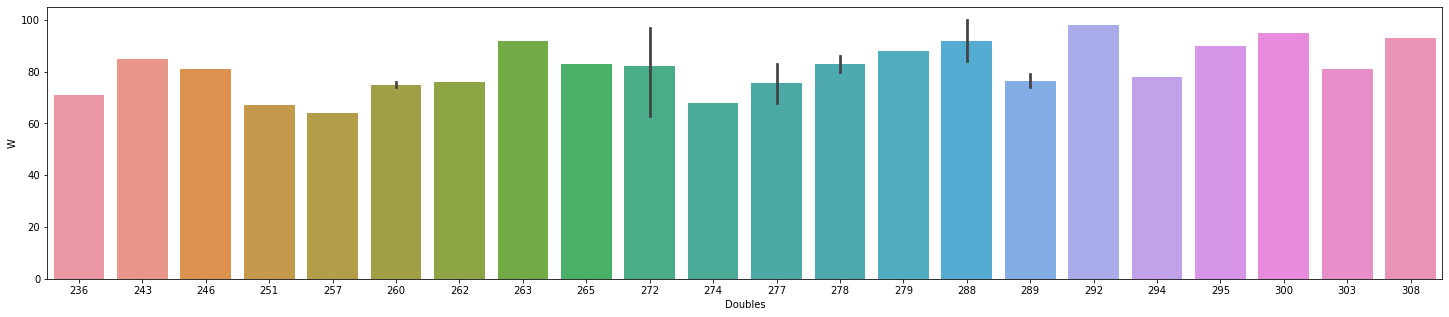

In [19]:
plt.figure(figsize=(25,5))
sns.barplot(x ='Doubles',y ='W',data=df)

In [20]:
df['Triples'].value_counts()

27    3
32    2
17    2
26    2
39    2
49    2
44    1
33    1
34    1
36    1
37    1
40    1
42    1
30    1
13    1
46    1
29    1
18    1
19    1
20    1
21    1
22    1
48    1
Name: Triples, dtype: int64

<AxesSubplot:xlabel='Triples', ylabel='W'>

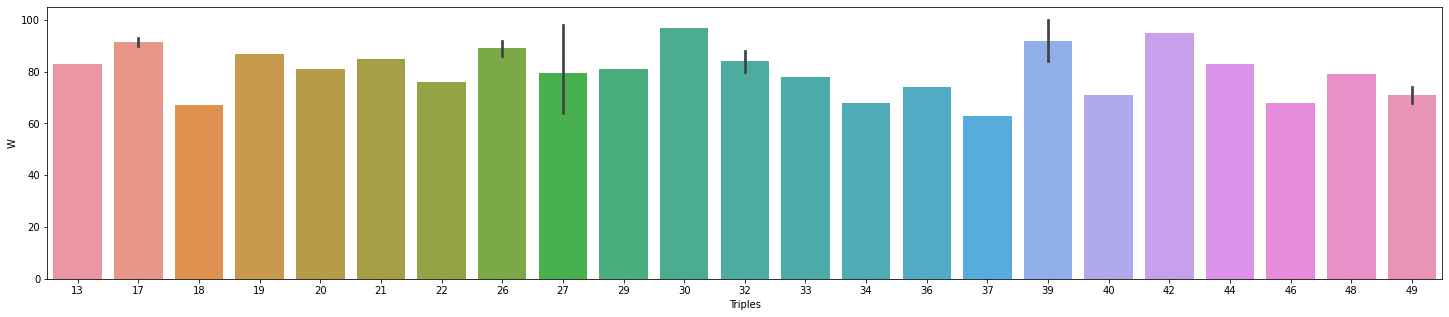

In [21]:
plt.figure(figsize=(25,5))
sns.barplot(x ='Triples',y ='W',data=df)

In [22]:
df['HR'].value_counts()

177    2
136    2
167    2
187    1
151    1
198    1
148    1
137    1
139    1
140    1
141    1
145    1
146    1
212    1
154    1
217    1
186    1
156    1
161    1
100    1
230    1
232    1
171    1
172    1
176    1
120    1
130    1
Name: HR, dtype: int64

<AxesSubplot:xlabel='HR', ylabel='W'>

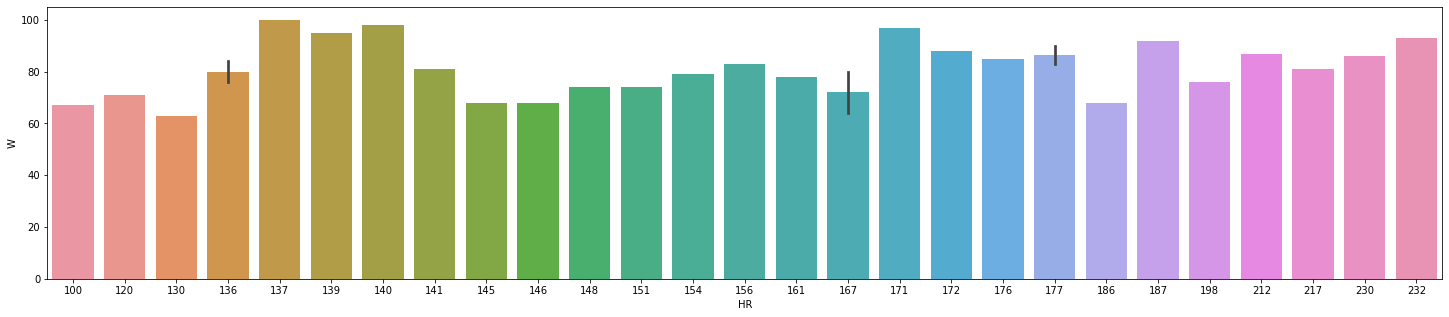

In [23]:
plt.figure(figsize=(25,5))
sns.barplot(x ='HR',y ='W',data=df)

In [24]:
df['BB'].value_counts()

478    2
570    1
471    1
490    1
439    1
455    1
388    1
457    1
461    1
375    1
426    1
435    1
404    1
533    1
383    1
539    1
475    1
412    1
418    1
486    1
488    1
554    1
496    1
563    1
436    1
567    1
503    1
506    1
387    1
Name: BB, dtype: int64

<AxesSubplot:xlabel='BB', ylabel='W'>

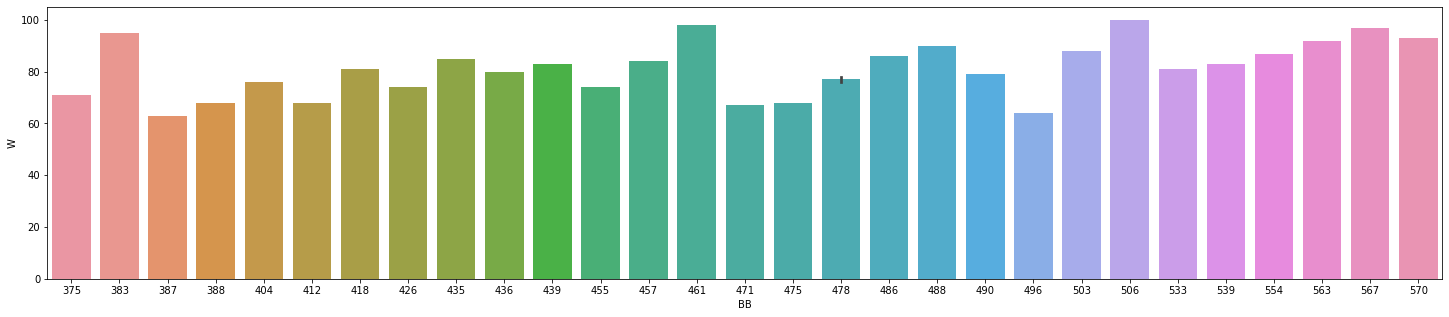

In [25]:
plt.figure(figsize=(25,5))
sns.barplot(x ='BB',y ='W',data=df)

In [26]:
df['SB'].value_counts

<bound method IndexOpsMixin.value_counts of 0     104
1      70
2      86
3      68
4      83
5      88
6      63
7      44
8      87
9      71
10    101
11    121
12     52
13     69
14     78
15     69
16     98
17     95
18     84
19    134
20     51
21     57
22    112
23     69
24     88
25     59
26     93
27    132
28     82
29     97
Name: SB, dtype: int64>

<AxesSubplot:xlabel='SB', ylabel='W'>

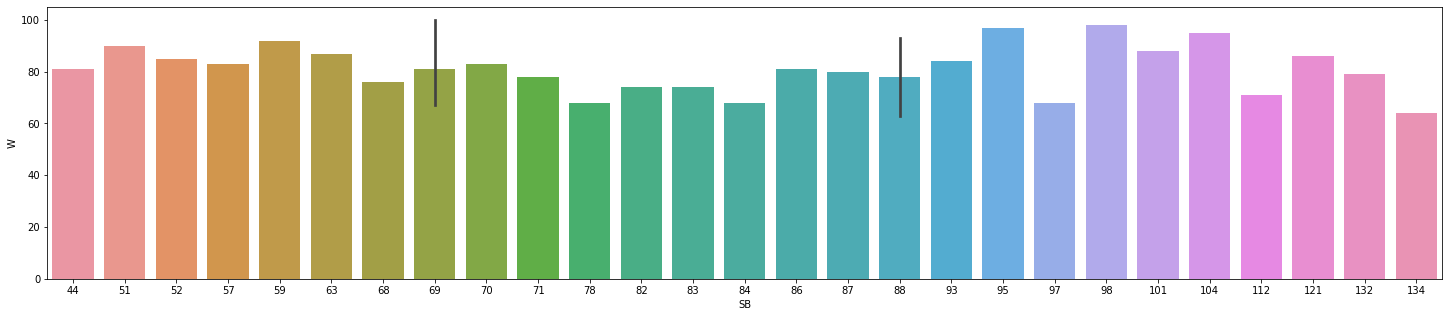

In [27]:
plt.figure(figsize=(25,5))
sns.barplot(x ='SB',y ='W',data=df)

In [28]:
df['CG'].value_counts()

1     7
7     4
2     4
6     3
5     3
3     3
0     3
4     2
11    1
Name: CG, dtype: int64

<AxesSubplot:xlabel='CG', ylabel='W'>

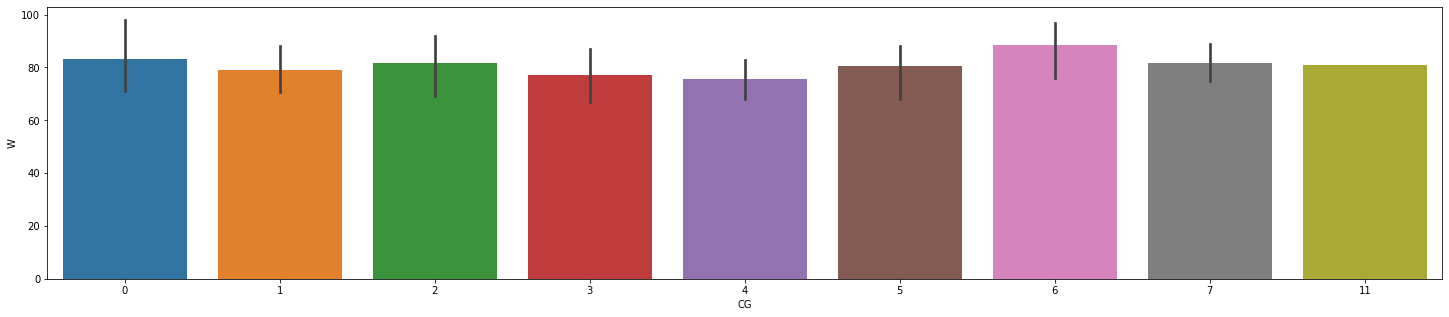

In [29]:
plt.figure(figsize=(25,5))
sns.barplot(x ='CG',y ='W',data=df)

In [30]:
df['SHO'].value_counts()

12    7
10    5
13    3
21    2
15    2
9     2
8     2
7     2
4     2
18    1
14    1
6     1
Name: SHO, dtype: int64

<AxesSubplot:xlabel='SHO', ylabel='W'>

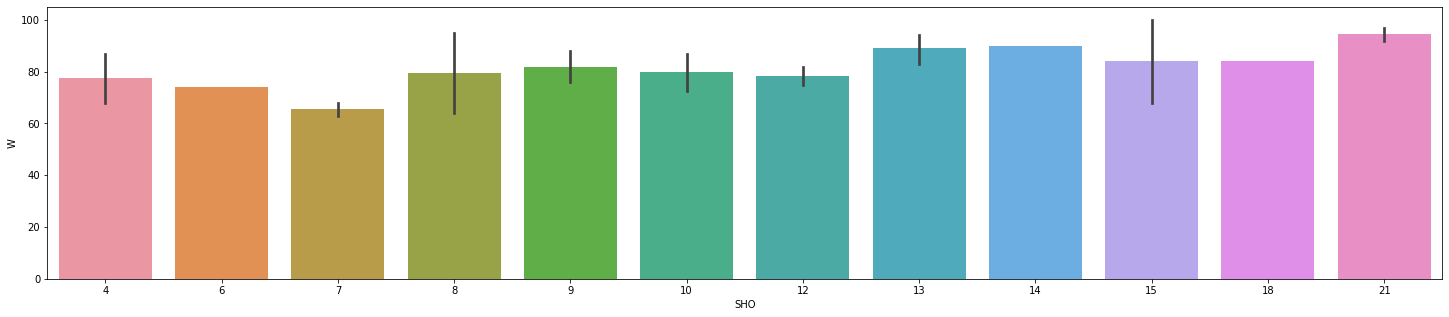

In [31]:
plt.figure(figsize=(25,5))
sns.barplot(x ='SHO',y ='W',data=df)

In [32]:
df['SV'].value_counts()

35    4
45    3
41    3
44    2
48    2
40    2
43    1
36    1
37    1
38    1
39    1
28    1
62    1
46    1
47    1
50    1
54    1
56    1
60    1
34    1
Name: SV, dtype: int64

<AxesSubplot:xlabel='SV', ylabel='W'>

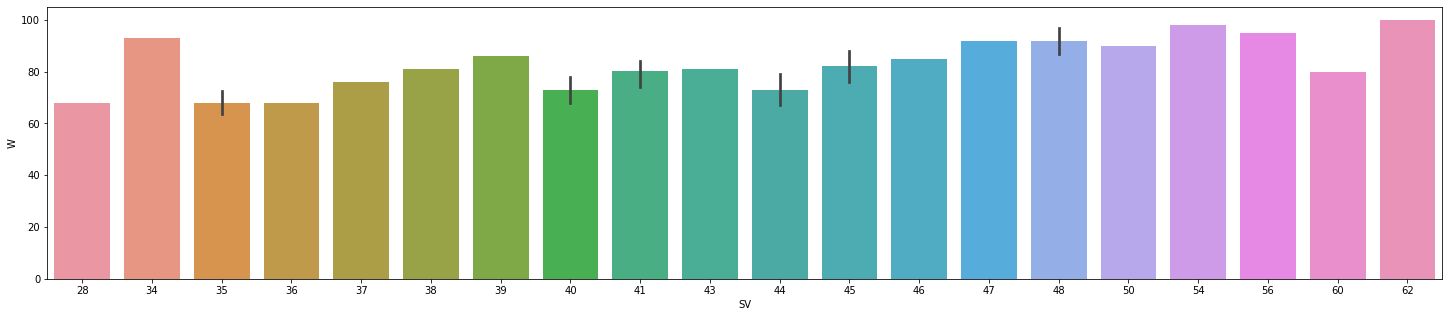

In [33]:
plt.figure(figsize=(25,5))
sns.barplot(x ='SV',y ='W',data=df)

In [34]:
df['E'].value_counts()

90     3
88     3
86     3
77     2
95     2
93     2
122    1
119    1
126    1
85     1
116    1
94     1
79     1
78     1
75     1
92     1
101    1
111    1
117    1
97     1
96     1
Name: E, dtype: int64

<AxesSubplot:xlabel='E', ylabel='W'>

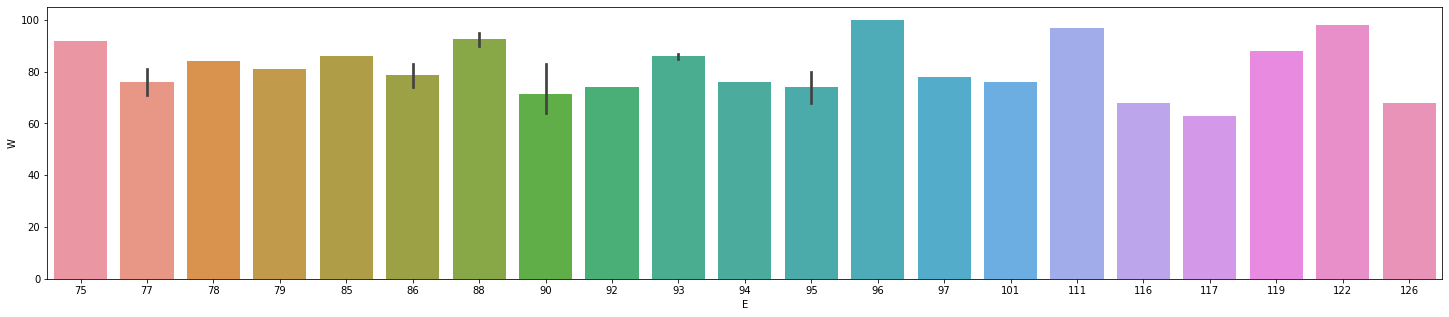

In [35]:
plt.figure(figsize=(25,5))
sns.barplot(x ='E',y ='W',data=df)

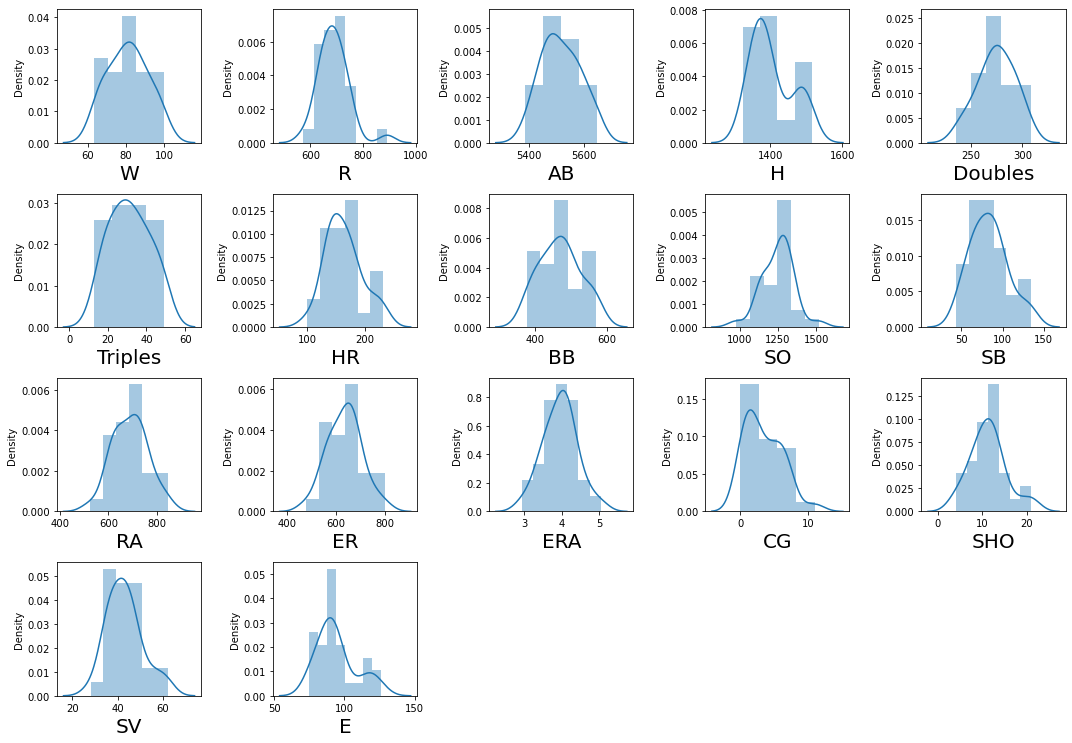

In [36]:
# Checking Skewness
plt.figure(figsize = (15,15),facecolor = 'white')
plotnumber = 1

for column in df:
    if plotnumber <=30:
        ax = plt.subplot(6,5,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize = 20)
        
    plotnumber+=1
plt.tight_layout()

In [37]:
df.skew()

W          0.047089
R          1.200786
AB         0.183437
H          0.670254
Doubles   -0.230650
Triples    0.129502
HR         0.516441
BB         0.158498
SO        -0.156065
SB         0.479893
RA         0.045734
ER         0.058710
ERA        0.053331
CG         0.736845
SHO        0.565790
SV         0.657524
E          0.890132
dtype: float64

In [38]:
feature = ['Doubles','Triples','HR','BB','SO','CG','SHO','SV']

In [39]:
# Removing Skewness Using Power Transformer
from sklearn.preprocessing import PowerTransformer

In [40]:
scaler = PowerTransformer(method = 'yeo-johnson')
'''
Parameters:
method = 'box-cox' or 'yeo jhonson'

'''

"\nParameters:\nmethod = 'box-cox' or 'yeo jhonson'\n\n"

In [41]:
df[feature] = scaler.fit_transform(df[feature].values)

In [42]:
df[feature].head()

,Doubles,Triples,HR,BB,SO,CG,SHO,SV
0,1.477685,1.033103,-0.764626,-1.610915,-2.569896,-0.359844,-0.789579,1.546378
1,0.084269,1.203320,-0.158581,-0.502749,0.134913,-0.359844,0.251775,0.360444
2,1.670782,-0.160270,-0.689676,1.128294,-0.901254,1.993513,-0.245393,-0.607594
3,-0.848600,-0.360521,-0.879049,-1.181207,-0.189628,1.220103,-0.510759,-0.764453
4,0.792183,1.616444,-0.329850,-0.206771,0.085459,1.220103,0.251775,-1.095010


In [43]:
df.skew()

W          0.047089
R          1.200786
AB         0.183437
H          0.670254
Doubles   -0.035315
Triples   -0.072933
HR        -0.000065
BB        -0.007760
SO         0.041170
SB         0.479893
RA         0.045734
ER         0.058710
ERA        0.053331
CG        -0.059785
SHO        0.006560
SV         0.000836
E          0.890132
dtype: float64

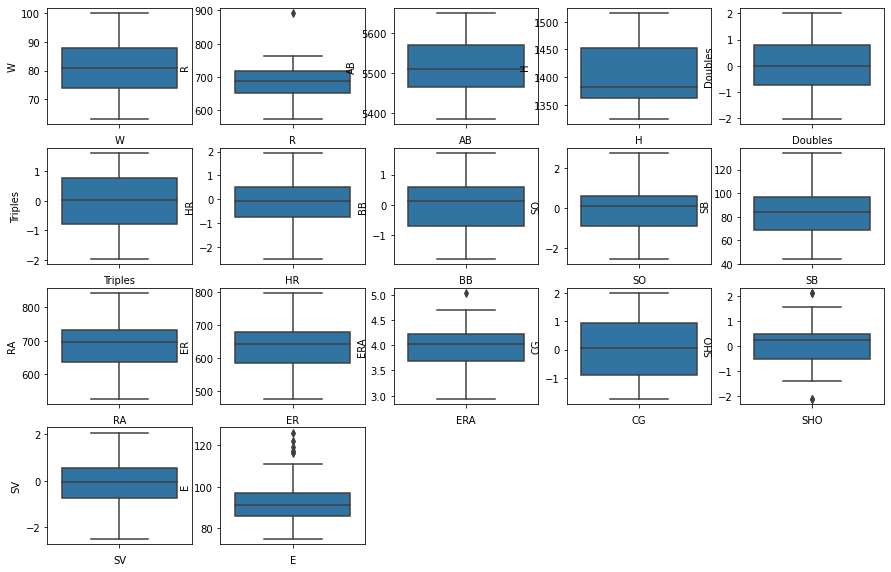

In [44]:
plt.figure(figsize=(15,15))

graph=1

for column in df.columns:
    if graph<=30:
        ax = plt.subplot(6,5,graph)
        sns.boxplot(y=df[column],orient='v') #orientation = v means vertical and if h that means horizontal
        plt.xlabel(column,fontsize=10)
    graph+=1
plt.show()

In [45]:
Outlier = df[['R','ERA','SHO','E']]

In [47]:
from scipy.stats import zscore

In [48]:
# applying zscore on only the dataset which has continuous columns
z=np.abs(zscore(Outlier))
# be carefull with the code and variables used here
df_new=df[(z<3).all(axis=1)]

In [49]:
print("shape before and after")
print("shape before".ljust(20),":", df.shape)
print("shape after".ljust(20),":", df_new.shape)
print("Percentage Loss".ljust(20),":", (df.shape[0]-df_new.shape[0])/df.shape[0])

shape before and after
shape before         : (30, 17)
shape after          : (29, 17)
Percentage Loss      : 0.03333333333333333


In [50]:
df_new.head()

,W,R,AB,H,Doubles,Triples,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,1.477685,1.033103,-0.764626,-1.610915,-2.569896,104,641,601,3.73,-0.359844,-0.789579,1.546378,88
1,83,696,5467,1349,0.084269,1.203320,-0.158581,-0.502749,0.134913,70,700,653,4.07,-0.359844,0.251775,0.360444,86
2,81,669,5439,1395,1.670782,-0.160270,-0.689676,1.128294,-0.901254,86,640,584,3.67,1.993513,-0.245393,-0.607594,79
3,76,622,5533,1381,-0.848600,-0.360521,-0.879049,-1.181207,-0.189628,68,701,643,3.98,1.220103,-0.510759,-0.764453,101
4,74,689,5605,1515,0.792183,1.616444,-0.329850,-0.206771,0.085459,83,803,746,4.64,1.220103,0.251775,-1.095010,86


In [51]:
df.corr()

,W,R,AB,H,Doubles,Triples,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.434324,-0.244971,0.319035,0.478181,0.124430,-0.157234,-0.812952,-0.809435,-0.819600,0.058044,0.458964,0.666202,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.567096,-0.088745,0.670026,0.392496,-0.051826,0.081367,-0.041623,-0.041245,-0.049281,0.260600,-0.116663,-0.091095,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.445201,0.427437,-0.032412,-0.124745,-0.105952,0.372618,0.316010,0.309686,0.255551,-0.063271,-0.192934,-0.142317,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.577673,0.462311,-0.085286,-0.119458,-0.397599,0.413444,0.224324,0.252489,0.231172,0.127263,-0.134241,-0.156458,-0.033173
Doubles,0.434324,0.567096,0.445201,0.577673,1.000000,0.204475,0.076143,0.301392,-0.173551,0.194490,-0.226413,-0.243344,-0.261417,0.279284,0.066977,0.129807,0.082746
Triples,-0.244971,-0.088745,0.427437,0.462311,0.204475,1.000000,-0.393924,-0.458272,-0.133889,0.469990,0.300118,0.326418,0.316566,-0.066691,-0.047706,-0.182646,0.140234
HR,0.319035,0.670026,-0.032412,-0.085286,0.076143,-0.393924,1.000000,0.417581,0.385912,-0.134965,-0.107588,-0.089520,-0.098179,0.194161,-0.027620,0.019674,-0.178540
BB,0.478181,0.392496,-0.124745,-0.119458,0.301392,-0.458272,0.417581,1.000000,0.238514,-0.100884,-0.414158,-0.451160,-0.459558,0.480102,0.405895,0.118506,-0.070370
SO,0.124430,-0.051826,-0.105952,-0.397599,-0.173551,-0.133889,0.385912,0.238514,1.000000,0.038214,-0.139222,-0.171394,-0.190040,-0.095856,0.216663,0.173120,0.157967
SB,-0.157234,0.081367,0.372618,0.413444,0.194490,0.469990,-0.134965,-0.100884,0.038214,1.000000,0.132290,0.143068,0.126063,-0.030613,-0.101345,-0.199858,0.079149


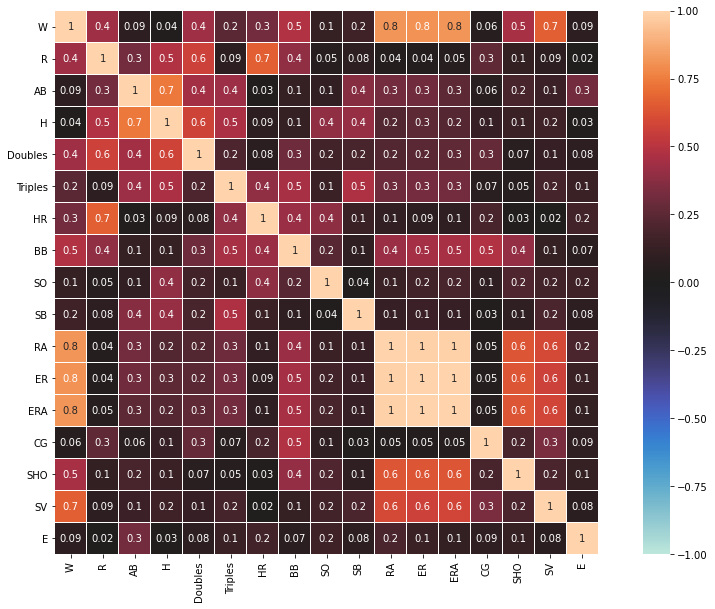

In [52]:
# Checking correlation with the help of heatmap
df_corr = df.corr().abs()

plt.figure(figsize = (16,10))
sns.heatmap(df_corr, vmin = -1,vmax = 1,annot=True,
           square = True,center = 0, fmt = '.1g',linewidths = .1,)
plt.show()


Less correlation among features so no need to do any thing for this

# Preprocessing Data

In [56]:
# Splitting Target and feature variable into x and y
x = df_new.drop(columns = ['W'])
y = df_new['W']

In [57]:
from sklearn.preprocessing import StandardScaler

In [58]:
scaler = StandardScaler()
x_scaler = scaler.fit_transform(x)
x_scaler

array([[ 0.95939835,  0.83008422,  1.73830631,  1.63754523,  1.00385739,
        -0.73533488, -1.60901046, -2.60065781,  0.9059529 , -0.66451353,
        -0.51114812, -0.51138828, -0.32077156, -0.78544371,  1.52018924,
        -0.47109143],
       [ 0.33114717, -0.70283074, -0.93869788,  0.16219052,  1.17773552,
        -0.09669396, -0.46014944,  0.10179095, -0.58531515,  0.15463823,
         0.23216082,  0.23895226, -0.32077156,  0.23947269,  0.32037612,
        -0.61489829],
       [-0.27466646, -1.10025314, -0.10665604,  1.84199686, -0.21518187,
        -0.6563541 ,  1.23078973, -0.93347178,  0.11645805, -0.67839746,
        -0.75415297, -0.64380131,  2.05480538, -0.24984806, -0.65899029,
        -1.1182223 ],
       [-1.32923093,  0.23395062, -0.35988616, -0.82553417, -0.41973953,
        -0.85591192, -1.16352281, -0.22246705, -0.6730368 ,  0.16852216,
         0.08921679,  0.04033271,  1.27409334, -0.51102495, -0.81768575,
         0.46365315],
       [ 0.17408438,  1.25589393,  2

# Finding Best Random State

In [59]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
maxscore = 0
maxrs = 0

for i in range(1,1000):
    x_train,x_test,y_train,y_test = train_test_split(x_scaler,y,test_size = 0.30,random_state = i)
    dt = DecisionTreeRegressor()
    dt.fit(x_train,y_train)
    pred = dt.predict(x_test)
    rsc = r2_score(y_test,pred)
    if rsc>maxscore:
        maxscore=rsc
        maxrs=i
print("Best r2 score is:",maxscore,"On Random state: ",maxrs)

Best r2 score is: 0.8503684111090118 On Random state:  719


In [64]:
x_train,x_test,y_train,y_test=train_test_split(x_scaler,y,random_state =i,test_size = 0.30)

In [65]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
pred = lr.predict(x_test)
print(r2_score(y_test,pred))

0.49862684322674344


In [66]:
from sklearn.model_selection import cross_val_score

In [67]:
print(cross_val_score(lr,x_scaler,y,cv=5).mean())

0.0700593181389195


In [68]:
dtr =DecisionTreeRegressor()
dtr.fit(x_test,y_test)
pred = dtr.predict(x_test)
print(r2_score(y_test,pred))

1.0


In [69]:
print(cross_val_score(dt,x_scaler,y,cv=5).mean())

-1.9469627880319718


In [71]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
pred = rf.predict(x_test)
print(r2_score(y_test,pred))

0.4853780681631982


In [72]:
print(cross_val_score(rf,x_scaler,y,cv=5).mean())

-0.48193439548823297


# Hyperparameter Tuning

As less difference between cv and r2 score is for linear regression so will do hyperparameter tuning for the same 

In [74]:
lr = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [75]:
param = {'copy_X':[1,3,4,5,6],'fit_intercept':[True],'n_jobs':[-1],'normalize':[False]}

In [77]:
from sklearn.model_selection import GridSearchCV

In [78]:
GC = GridSearchCV(lr,param,cv=5)

In [79]:
GC.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [1, 3, 4, 5, 6], 'fit_intercept': [True],
                         'n_jobs': [-1], 'normalize': [False]})

In [80]:
GC.best_params_

{'copy_X': 1, 'fit_intercept': True, 'n_jobs': -1, 'normalize': False}

In [81]:
final_lr = LinearRegression(copy_X=1, fit_intercept='True', n_jobs=-1, normalize='False')
final_lr.fit(x_train,y_train)
pred = final_lr.predict(x_test)
score = r2_score(y_test,pred)
print(score*100)

49.86268432267432


# Save the model

In [83]:
import joblib
joblib.dump(final_lr,'FinalmodelBaseball.pk1')

['FinalmodelBaseball.pk1']